In [2]:
import pandas as pd

In [3]:
header=['google_url', 'place_name', 'total_rating', 'place_category', 'total_reviews', 'cost', 'address', 'district', 'eat_in', 'to_go_1', 'to_go_2', 'delivery', 'opening_hours', 'website', 'phone', 'close', 'place_acquisition_date']
df_01 = pd.read_csv('Data/raw_data/restaurant/place_info/raw_data_add_place_info/place_info_1.csv', header=None, names=header)
df_02 = pd.read_csv('Data/raw_data/restaurant/place_info/raw_data_add_place_info/place_info_2.csv', header=None, names=header)
df_03 = pd.read_csv('Data/raw_data/restaurant/place_info/raw_data_add_place_info/place_info_3.csv', header=None, names=header)
df_04 = pd.read_csv('Data/raw_data/restaurant/place_info/raw_data_add_place_info/place_info_4.csv', header=None, names=header)
df_05 = pd.read_csv('Data/raw_data/restaurant/place_info/raw_data_add_place_info/place_info_5.csv', header=None, names=header)
df_06 = pd.read_csv('Data/raw_data/restaurant/place_info/raw_data_add_place_info/place_info_6.csv', header=None, names=header)
df_total = pd.concat([df_01, df_02, df_03, df_04, df_05, df_06])
df_total.head()

,google_url,place_name,total_rating,place_category,total_reviews,cost,address,district,eat_in,to_go_1,to_go_2,delivery,opening_hours,website,phone,close,place_acquisition_date
0,https://www.google.com.tw/maps/place/%E9%BB%91...,黑曜麵屋,4.1,拉麵店,379.0,$,112台北市北投區尊賢街206巷2號,Plus Code: 4G85+47 北投區 台北市,1,1,0,1,星期二、11:00 到 21:00; 星期三、11:00 到 21:00; 星期四、11:0...,https://www.facebook.com/Obsidianhouse/,0979 047 907,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E6%A8%82...,樂山窄巷拉麵,4.1,拉麵店,1681.0,$$,112台北市北投區大同街27號,Plus Code: 4FMX+5J 北投區 台北市,1,1,0,0,星期二、11:00 到 14:30、17:00 到 20:30; 星期三、11:00 到 1...,https://www.facebook.com/rakuzan428/,02 2892 6265,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E6%97%A5...,日本拉麵屋,4.0,拉麵店,310.0,$,112台北市北投區中和街303號,Plus Code: 4FRX+7X 北投區 台北市,1,1,0,0,星期二、11:30 到 14:00、17:00 到 21:00; 星期三、11:30 到 1...,http://keeat.pixnet.net/blog/post/443310128,02 2893 4585,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E8%8D%B7...,荷麵亭Hasumentei 北投店,4.4,拉麵店,245.0,NaN,112台北市北投區育仁路45號,Plus Code: 4FMX+95 北投區 台北市,1,1,0,0,星期二、11:40 到 14:30、17:10 到 20:30; 星期三、11:40 到 1...,https://www.facebook.com/HASUMENTEI,02 2898 2565,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E3%82%89...,らあめん花月嵐 北投石牌店,3.3,拉麵店,328.0,$$,112台北市北投區石牌路二段122號,Plus Code: 4G98+4W 北投區 台北市,1,0,1,1,星期二、11:00 到 22:00; 星期三、11:00 到 22:00; 星期四、11:0...,https://www.kagetsu.com.tw/,02 2822 0228,NaN,2022-11-22


### 原始餐廳地點資料筆數

In [5]:
df_total.shape[0]

58588

### 查看欄位null數量

In [6]:
df_total.isnull().sum()

google_url                    0
place_name                   26
total_rating               2986
place_category             2708
total_reviews             11960
cost                      39331
address                     276
district                    281
eat_in                        0
to_go_1                       0
to_go_2                       0
delivery                      0
opening_hours              9217
website                   23143
phone                      7794
close                     56038
place_acquisition_date        0
dtype: int64

### 刪除重複url

In [7]:
df_drop_url = df_total.drop_duplicates(subset='google_url', keep='last')
df_drop_url.shape[0]

57622

### 刪除永久關閉、暫時停業

In [8]:
df_drop_close = df_drop_url[df_drop_url['close'].isnull()]
df_drop_close.shape[0]

55111

### 刪除沒有地點名稱

In [9]:
df_drop_name = df_drop_close.dropna(subset='place_name')
df_drop_name.shape[0]

55085

### 刪除沒有評論

In [10]:
df_drop_reviews = df_drop_name.dropna(subset='total_reviews')
df_drop_reviews.shape[0]

44378

### 刪除地址空值&非台北

In [11]:
df_drop_address = df_drop_reviews.dropna(subset='address')
df_taipei = df_drop_address[df_drop_address['address'].str.contains('台北市')]
df_taipei.shape[0]

32902

### 查看整理後空值

In [12]:
df_taipei.isnull().sum()

google_url                    0
place_name                    0
total_rating                  0
place_category              602
total_reviews                 0
cost                      20830
address                       0
district                      2
eat_in                        0
to_go_1                       0
to_go_2                       0
delivery                      0
opening_hours              2780
website                   10218
phone                      2578
close                     32902
place_acquisition_date        0
dtype: int64

### 查看place_category空值有包含誰

In [14]:
pd.set_option("display.max_rows",1000)

In [15]:
df_place_null = df_taipei[df_taipei['place_category'].isnull()]
df_place_null

,google_url,place_name,total_rating,place_category,total_reviews,cost,address,district,eat_in,to_go_1,to_go_2,delivery,opening_hours,website,phone,close,place_acquisition_date
0,https://www.google.com.tw/maps/place/%E5%A4%A7...,大地酒店,4.4,NaN,3142.0,NaN,112台北市北投區奇岩路1號,Plus Code: 4GP4+2Q 北投區 台北市,0,0,0,0,NaN,https://www.thegaiahotel.com/,02 5551 8888,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E6%97%A5...,日勝生加賀屋國際溫泉飯店,4.3,NaN,3343.0,NaN,112台北市北投區光明路236號,Plus Code: 4GP4+CR 北投區 台北市,0,0,0,0,NaN,http://www.kagaya.com.tw/,02 2891 1111,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E5%8C%97...,北投老爺酒店,4.3,NaN,2446.0,$$$,112台北市北投區中和街二號,Plus Code: 4GQ3+3G 北投區 台北市,0,0,0,0,NaN,https://www.hotelroyal.com.tw/zh-tw/beitou/,02 2896 9777,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E5%A4%A7...,大地酒店,4.4,NaN,3142.0,NaN,112台北市北投區奇岩路1號,Plus Code: 4GP4+2Q 北投區 台北市,0,0,0,0,NaN,https://www.thegaiahotel.com/,02 5551 8888,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E5%8C%97...,北投水美溫泉會館,4.0,NaN,2246.0,NaN,112台北市北投區光明路224號,Plus Code: 4GP4+F2 北投區 台北市,0,0,0,0,NaN,http://www.sweetme.com.tw/,02 2898 3838,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E5%8C%97...,北投老爺酒店,4.3,NaN,2446.0,$$$,112台北市北投區中和街二號,Plus Code: 4GQ3+3G 北投區 台北市,0,0,0,0,NaN,https://www.hotelroyal.com.tw/zh-tw/beitou/,02 2896 9777,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E6%B0%B4...,水都溫泉會館,3.4,NaN,1015.0,NaN,112台北市北投區光明路283號,Plus Code: 4GP6+QC 北投區 台北市,0,0,0,0,NaN,http://www.spaspringresort.com.tw/,02 2897 9060,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E5%8C%97...,北投麗禧溫泉酒店 Grand View Resort Beitou,4.5,NaN,4929.0,NaN,112台北市北投區幽雅路30號,Plus Code: 4GQ7+4X 北投區 台北市,0,0,0,0,NaN,http://www.gvrb.com.tw/,02 2898 8888,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E5%8C%97...,北投水美溫泉會館,4.0,NaN,2246.0,NaN,112台北市北投區光明路224號,Plus Code: 4GP4+F2 北投區 台北市,0,0,0,0,NaN,http://www.sweetme.com.tw/,02 2898 3838,NaN,2022-11-22
0,https://www.google.com.tw/maps/place/%E5%8C%97...,北投麗禧溫泉酒店 Grand View Resort Beitou,4.5,NaN,4929.0,NaN,112台北市北投區幽雅路30號,Plus Code: 4GQ7+4X 北投區 台北市,0,0,0,0,NaN,http://www.gvrb.com.tw/,02 2898 8888,NaN,2022-11-22


### 篩選pikao版

In [341]:
category_pikao = pd.read_csv('category_pikao.csv', header=None)

,0


### 篩選place_category類別

In [363]:
df_category = df_taipei[df_taipei['place_category'].isin(category_pikao[0])]
df_category.to_csv('place_info_classification.csv', index=None)

### 篩選評論數>100

In [355]:
df_100 = df_category[df_category['total_reviews']>=100]
df_100.shape[0]

14787

In [358]:
df_100['total_reviews'].sum()

10072880.0

(array([1.0758e+04, 2.0860e+03, 8.1200e+02, 4.3000e+02, 2.2300e+02,
        1.1800e+02, 1.0700e+02, 5.6000e+01, 5.8000e+01, 2.3000e+01,
        1.7000e+01, 1.6000e+01, 1.8000e+01, 1.1000e+01, 8.0000e+00,
        3.0000e+00, 9.0000e+00, 5.0000e+00, 4.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

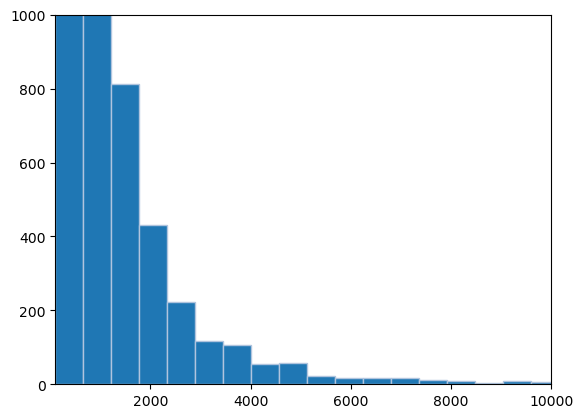

In [357]:
import matplotlib.pyplot as plt
axes = plt.axes()
axes.set_xlim([100, 10000])
axes.set_ylim([0, 1000])
plt.hist(df_100['total_reviews'], bins=100, edgecolor="LightSteelBlue")

# 備註: place_category = NaN的還沒處理